In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import  GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb
import shap

In [2]:
loan_df=pd.read_csv("credit_train.csv")

In [3]:
loan_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
loan_df.shape

(100514, 19)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
loan_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
loan_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [8]:
loan_df['Loan Status']=loan_df['Loan Status'].map({'Fully Paid':int('1'), "Charged Off":int('0')})

In [9]:
loan_df['Loan Status'].value_counts()

1.0    77361
0.0    22639
Name: Loan Status, dtype: int64

In [10]:
loan_df['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [11]:
loan_df['Term']=loan_df['Term'].map({'Short Term':int('0'), 'Long Term':int('1')})

In [12]:
loan_df['Term'].value_counts()

0.0    72208
1.0    27792
Name: Term, dtype: int64

In [13]:
loan_df['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [14]:
loan_df['Years in current job']=loan_df['Years in current job'].map({'10+ years':int('0'), '2 years':int('1'),
                                                                     '3 years ':int('2'), '< 1 year':int('3'),
                                                                     '5 years ':int('4'), '1 year ':int('5'),
                                                                    '4 years':int('6'), '6 years':int('7'),
                                                                    '7 years':int('8'), '8 years':int('9'),
                                                                    '9 years':int('10')})

In [15]:
loan_df['Years in current job'].value_counts()

0.0     31121
1.0      9134
3.0      8164
6.0      6143
7.0      5686
8.0      5577
9.0      4582
10.0     3955
Name: Years in current job, dtype: int64

In [16]:
loan_df['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [17]:
loan_df['Home Ownership']=loan_df['Home Ownership'].map({'Home Mortgage':int('0'), 'Rent':int('1'), 'Own Home':int('2')
                                                        , 'HaveMortgage':int('3')})

In [18]:
loan_df['Home Ownership'].value_counts()

0.0    48410
1.0    42194
2.0     9182
3.0      214
Name: Home Ownership, dtype: int64

In [19]:
loan_df['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [20]:
loan_df['Purpose']=loan_df['Purpose'].map({'Debt Consolidation':int('0'), 'other':int('1'),
                                                                     'Home Improvements':int('2'), 'Other':int('1'),
                                                                     'Business Loan':int('3'), 'Buy a Car':int('4'),
                                                                    'Medical Bills':int('5'), 'Buy House':int('6'),
                                                                    'Take a Trip':int('7'), 'major_purchase':int('8'),
                                                                        'small_business':int('9'),'moving':int('10'),
                                          'wedding':int('11'), 'vacation':int('12'), 'Educational Expenses':int('13')
                                              , 'renewable_energy':int('14')})

In [21]:
loan_df['Purpose'].value_counts()

0.0     78552
1.0      9287
2.0      5839
3.0      1569
4.0      1265
5.0      1127
6.0       678
7.0       573
8.0       352
9.0       283
10.0      150
11.0      115
12.0      101
13.0       99
14.0       10
Name: Purpose, dtype: int64

In [22]:
loan_train=loan_df.drop({"Loan ID", "Customer ID","Months since last delinquent"}, axis=1)

In [23]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,0.0,NaN,NaN,0.0,0.0,0.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,1.0,721.0,806949.0,NaN,2.0,0.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,0.0,NaN,NaN,NaN,1.0,0.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [24]:
loan_train.isnull().sum()

Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                 19668
Annual Income                19668
Years in current job         26152
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

In [25]:
loan_train=loan_train.dropna(axis=0)

In [26]:
loan_train.shape

(60046, 16)

In [27]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
5,0.0,206602.0,0.0,7290.0,896857.0,0.0,0.0,0.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1.0,217646.0,0.0,730.0,1184194.0,3.0,0.0,0.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1.0,548746.0,0.0,678.0,2559110.0,1.0,1.0,0.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [28]:
loan_train.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [29]:
x= loan_train.drop(['Loan Status' ] , axis=1)
y = loan_train['Loan Status'].values

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 42)

In [31]:
print(x_train.shape , x_test.shape)

(45034, 15) (15012, 15)


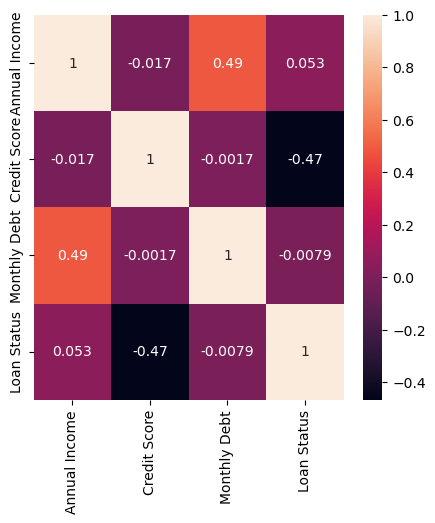

In [90]:
fig = plt.figure(figsize = (5,5))
#Pearson Correlation Matrix
sns.heatmap(loan_df[['Annual Income','Credit Score','Monthly Debt','Loan Status']].corr(),annot=True);

<AxesSubplot:title={'center':'pie chart of loan status'}, ylabel='Loan Status'>

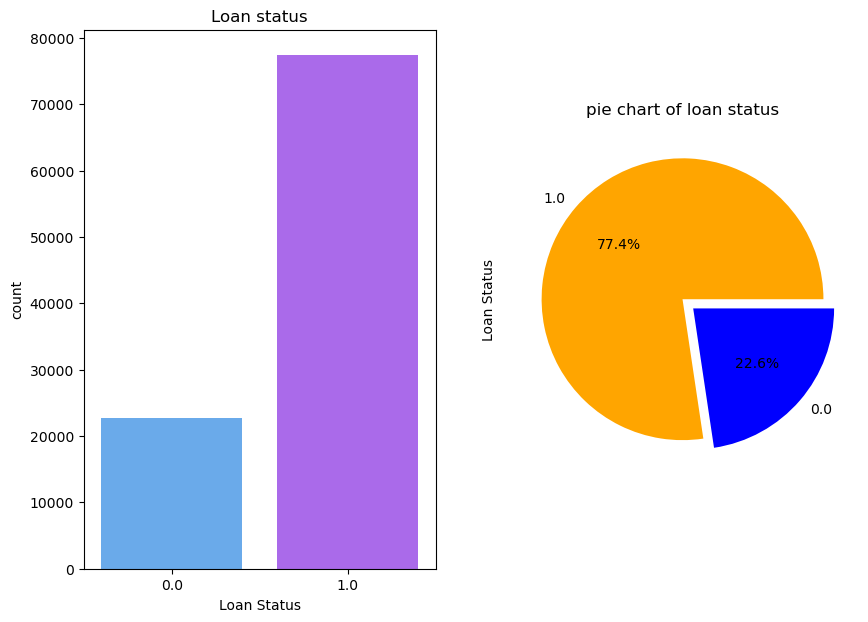

In [102]:
plt.subplot(1,2,1)
sns.countplot(loan_df['Loan Status'],palette = 'cool')
plt.title("Loan status")

plt.subplot(1,2,2)
count = loan_df['Loan Status'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['orange', 'blue'], figsize= (10,7), explode= [0,0.1], title = "pie chart of loan status")

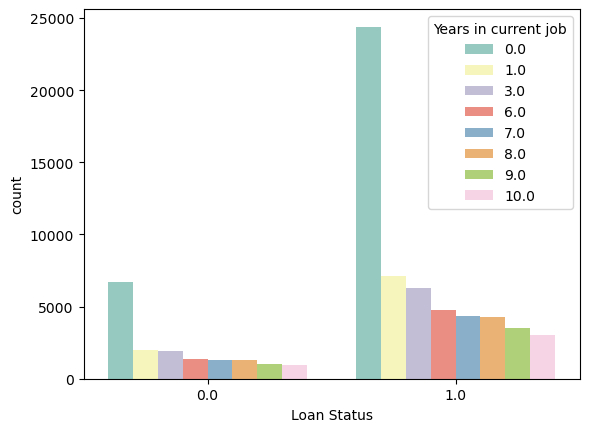

In [106]:
ax = sns.countplot(x="Loan Status", data=loan_df,hue="Years in current job",palette="Set3")

## Decision Tree Model

In [32]:
dt = DecisionTreeClassifier()

In [33]:
parameters = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 3, 4, 5]}
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 4, 5]})

In [34]:
y_pred_dt = clf.predict(x_test)
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.26      0.42      3159
         1.0       0.84      1.00      0.91     11853

    accuracy                           0.84     15012
   macro avg       0.92      0.63      0.66     15012
weighted avg       0.87      0.84      0.81     15012



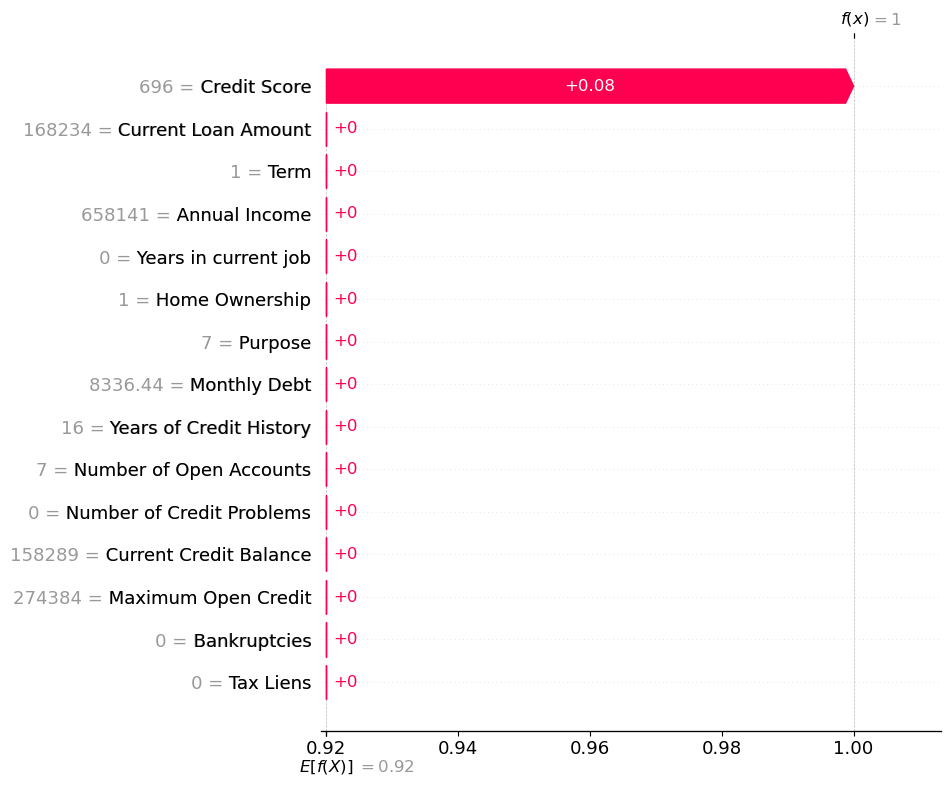

                      feature  contribution  base_value
0         Current Loan Amount          0.00        0.92
1                        Term          0.00        0.92
2                Credit Score          0.08        0.92
3               Annual Income          0.00        0.92
4        Years in current job          0.00        0.92
5              Home Ownership          0.00        0.92
6                     Purpose          0.00        0.92
7                Monthly Debt          0.00        0.92
8     Years of Credit History          0.00        0.92
9     Number of Open Accounts          0.00        0.92
10  Number of Credit Problems          0.00        0.92
11     Current Credit Balance          0.00        0.92
12        Maximum Open Credit          0.00        0.92
13               Bankruptcies          0.00        0.92
14                  Tax Liens          0.00        0.92


In [35]:
explainer_dt = shap.Explainer(clf.predict, x_test[1:500])
shap_values_dt = explainer_dt(x_test[1:500])
shap.waterfall_plot(shap_values_dt[165], max_display=20)

# extract the data used to create the plot
feature_names_dt = shap_values_dt.feature_names
contribution_dt = shap_values_dt.values[165]
base_value_dt = shap_values_dt.base_values[165]

# create a pandas DataFrame
data_dt = {
    'feature': feature_names_dt,
    'contribution': contribution_dt,
    'base_value': base_value_dt
}
df_dt = pd.DataFrame(data_dt)
print(df_dt)





In [36]:
total_contribution_dt=np.sum(contribution_dt)
print(total_contribution_dt)

0.08000000000000003


In [37]:
predicted_value_dt=base_value_dt + total_contribution_dt
print(predicted_value_dt)

1.0


In [38]:
result=[]
result_max=[]
result_feature=[]
if(predicted_value_dt <=0):
    min_3_values = df_dt.nsmallest(3, 'contribution')
    max_values = df_dt.nlargest(1, 'contribution')
    
    selected_value=min_3_values[['feature', 'contribution']]
    df_selected=pd.DataFrame(selected_value)

    
    df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution_dt) * 100)
    print(df_selected)
    
    condition = df_selected.loc[df_selected['percentage'] >=10]
    
    for index, row in condition.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    for index, row in max_values.iterrows():
        feature_variable=row['feature']
        result_max.append(feature_variable)

    print('\n')   
    print("We are sorry to inform you that you are not elligible for the loan at the moment")
    print(f"Though you are having a good {result_max[0]}")
    print("Due to the following issues your loan got rejected:",',' .join([str(lst) for lst in result]))
    print("If you have any questions or concerns about our decision, please do not hesitate to reach out to us.")
    
else:
    max_3_values = df_dt.nlargest(3, 'contribution')
    
    selected_value=max_3_values[['feature', 'contribution']]
   
    df_selected_max=pd.DataFrame(selected_value)
    df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution_dt) * 100)
    print(df_selected_max)

    for index, row in max_3_values.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    print('\n')    
    print("Congrats You are eligible for the loan !")
    print("There are severable factors which makes this possible such as:",',' .join([str(lst) for lst in result]))
    


               feature  contribution  percentage
2         Credit Score          0.08       100.0
0  Current Loan Amount          0.00         0.0
1                 Term          0.00         0.0


Congrats You are eligible for the loan !
There are severable factors which makes this possible such as: Credit Score,Current Loan Amount,Term


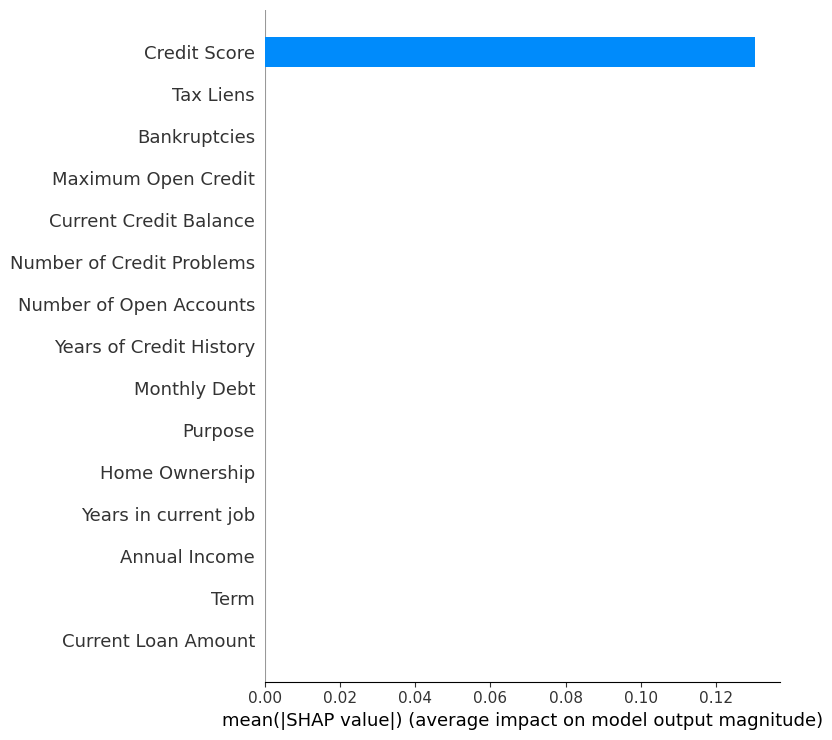

In [39]:
shap.summary_plot(shap_values_dt, x_test, plot_type="bar")

## Random Forest Model

In [40]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_leaf=5, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf =rf.predict(x_test)

In [41]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.26      0.42      3159
         1.0       0.84      1.00      0.91     11853

    accuracy                           0.84     15012
   macro avg       0.92      0.63      0.66     15012
weighted avg       0.87      0.84      0.81     15012



Permutation explainer: 500it [02:09,  3.55it/s]                                 


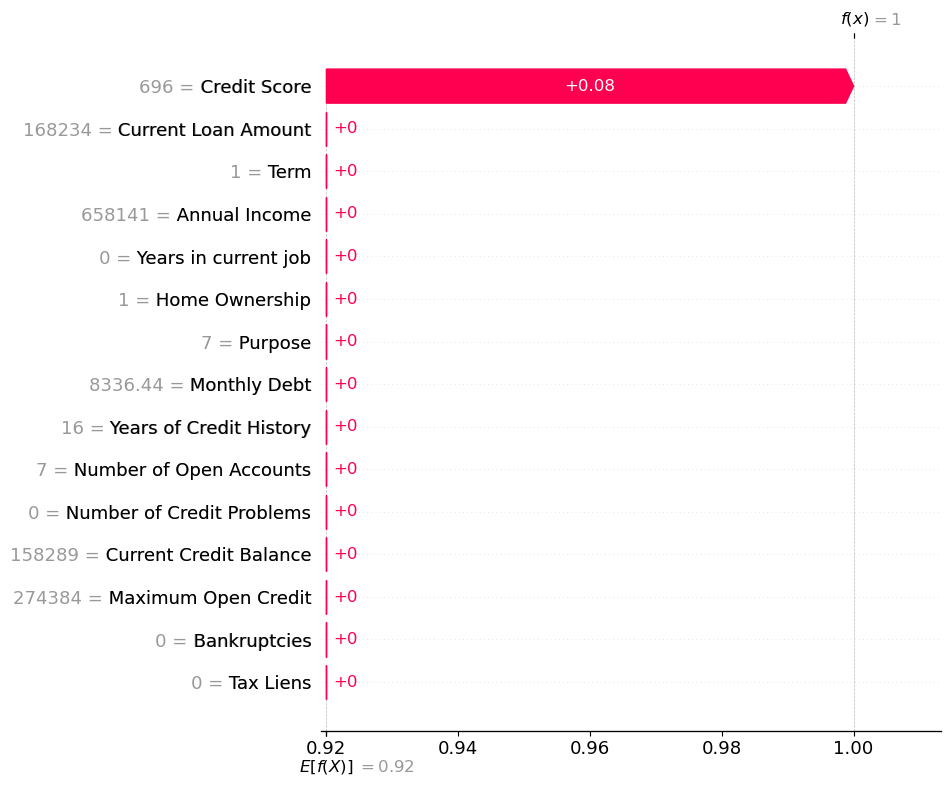

                      feature  contribution  base_value
0         Current Loan Amount          0.00        0.92
1                        Term          0.00        0.92
2                Credit Score          0.08        0.92
3               Annual Income          0.00        0.92
4        Years in current job          0.00        0.92
5              Home Ownership          0.00        0.92
6                     Purpose          0.00        0.92
7                Monthly Debt          0.00        0.92
8     Years of Credit History          0.00        0.92
9     Number of Open Accounts          0.00        0.92
10  Number of Credit Problems          0.00        0.92
11     Current Credit Balance          0.00        0.92
12        Maximum Open Credit          0.00        0.92
13               Bankruptcies          0.00        0.92
14                  Tax Liens          0.00        0.92


In [42]:
explainer_rf = shap.Explainer(rf.predict, x_test[1:500])
shap_values_rf = explainer_rf(x_test[1:500])
shap.waterfall_plot(shap_values_rf[165], max_display=20)

# extract the data used to create the plot
feature_names_rf = shap_values_rf.feature_names
contribution_rf = shap_values_rf.values[165]
base_value_rf = shap_values_rf.base_values[165]

# create a pandas DataFrame
data_rf = {
    'feature': feature_names_rf,
    'contribution': contribution_rf,
    'base_value': base_value_rf
}
df_rf = pd.DataFrame(data_rf)
print(df_rf)

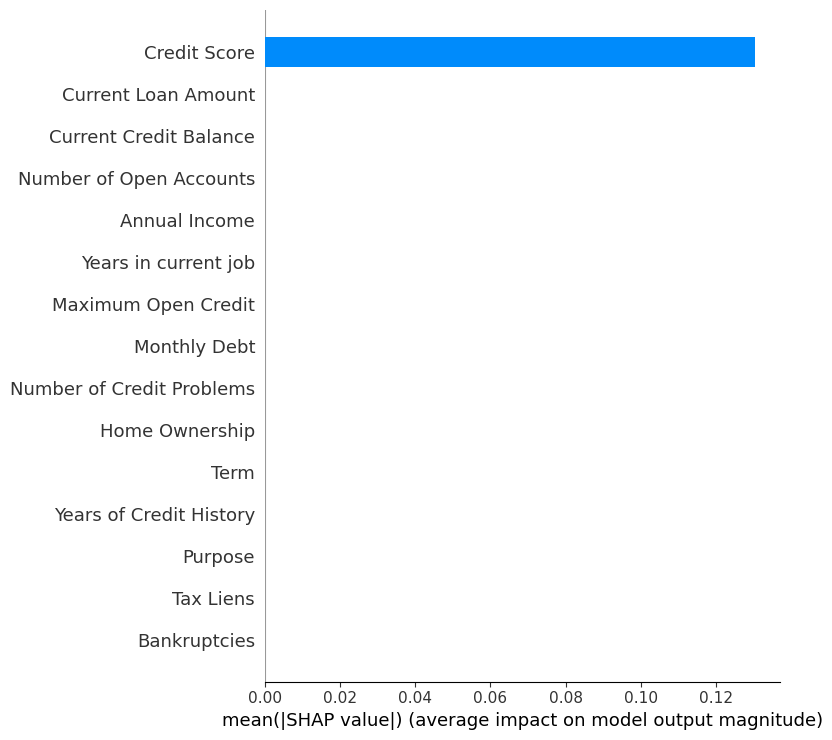

In [43]:
shap.summary_plot(shap_values_rf, x_test, plot_type="bar")

In [44]:
total_contribution_rf=np.sum(contribution_rf)
print(total_contribution_rf)

0.08000000000000003


In [45]:
predicted_value_rf=base_value_rf + total_contribution_rf
print(predicted_value_rf)

1.0


## KNeighborsClassifier Model

In [46]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [47]:
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

         0.0       0.38      0.05      0.09      3159
         1.0       0.79      0.98      0.88     11853

    accuracy                           0.78     15012
   macro avg       0.59      0.51      0.48     15012
weighted avg       0.71      0.78      0.71     15012



Permutation explainer: 500it [05:31,  1.46it/s]                                 


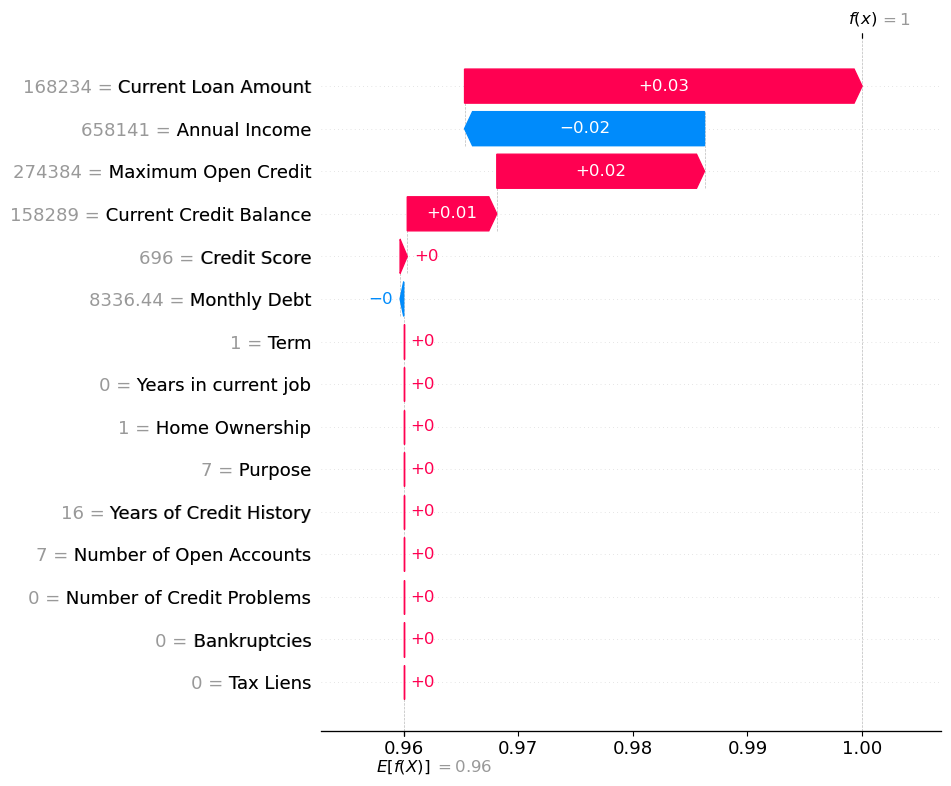

                      feature  contribution  base_value
0         Current Loan Amount      0.034688        0.96
1                        Term      0.000000        0.96
2                Credit Score      0.000625        0.96
3               Annual Income     -0.020937        0.96
4        Years in current job      0.000000        0.96
5              Home Ownership      0.000000        0.96
6                     Purpose      0.000000        0.96
7                Monthly Debt     -0.000313        0.96
8     Years of Credit History      0.000000        0.96
9     Number of Open Accounts      0.000000        0.96
10  Number of Credit Problems      0.000000        0.96
11     Current Credit Balance      0.007813        0.96
12        Maximum Open Credit      0.018125        0.96
13               Bankruptcies      0.000000        0.96
14                  Tax Liens      0.000000        0.96


In [48]:
explainer_knn = shap.Explainer(knn.predict, x_test[1:500])
shap_values_knn = explainer_knn(x_test[1:500])
shap.waterfall_plot(shap_values_knn[165], max_display=20)

# extract the data used to create the plot
feature_names_knn = shap_values_knn.feature_names
contribution_knn = shap_values_knn.values[165]
base_value_knn = shap_values_knn.base_values[165]

# create a pandas DataFrame
data_knn = {
    'feature': feature_names_knn,
    'contribution': contribution_knn,
    'base_value': base_value_knn
}
df_knn = pd.DataFrame(data_knn)
print(df_knn)

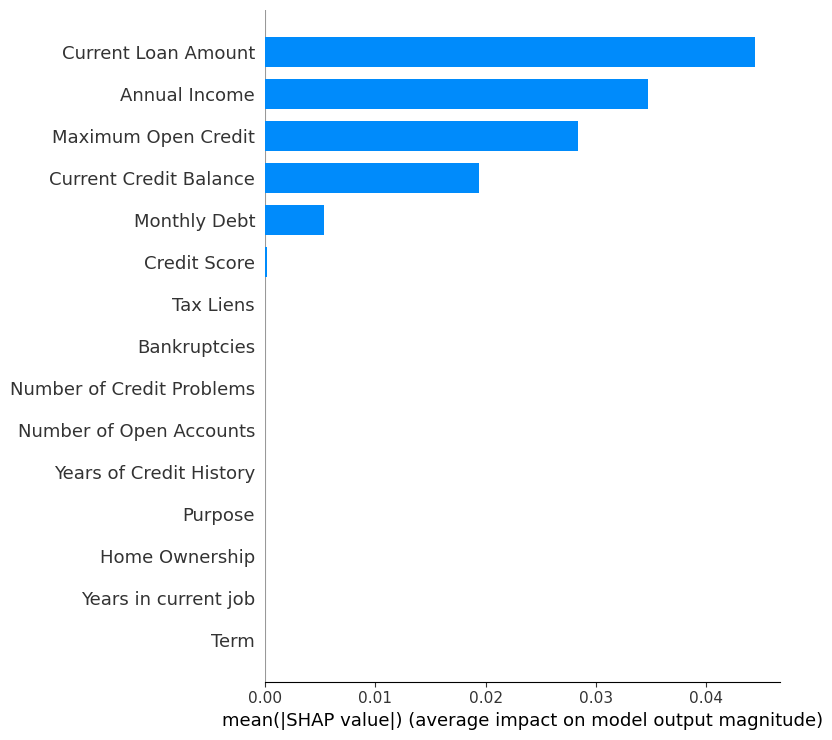

In [49]:
shap.summary_plot(shap_values_knn, x_test, plot_type="bar")

In [50]:
total_contribution_knn=np.sum(contribution_knn)
print(total_contribution_knn)

0.040000000000000036


In [51]:
predicted_value_knn=base_value_knn + total_contribution_knn
print(predicted_value_knn)

1.0


## LogisticRegression Model

In [52]:
lr= LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [53]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.26      0.41      3159
         1.0       0.83      0.99      0.91     11853

    accuracy                           0.84     15012
   macro avg       0.88      0.63      0.66     15012
weighted avg       0.85      0.84      0.80     15012



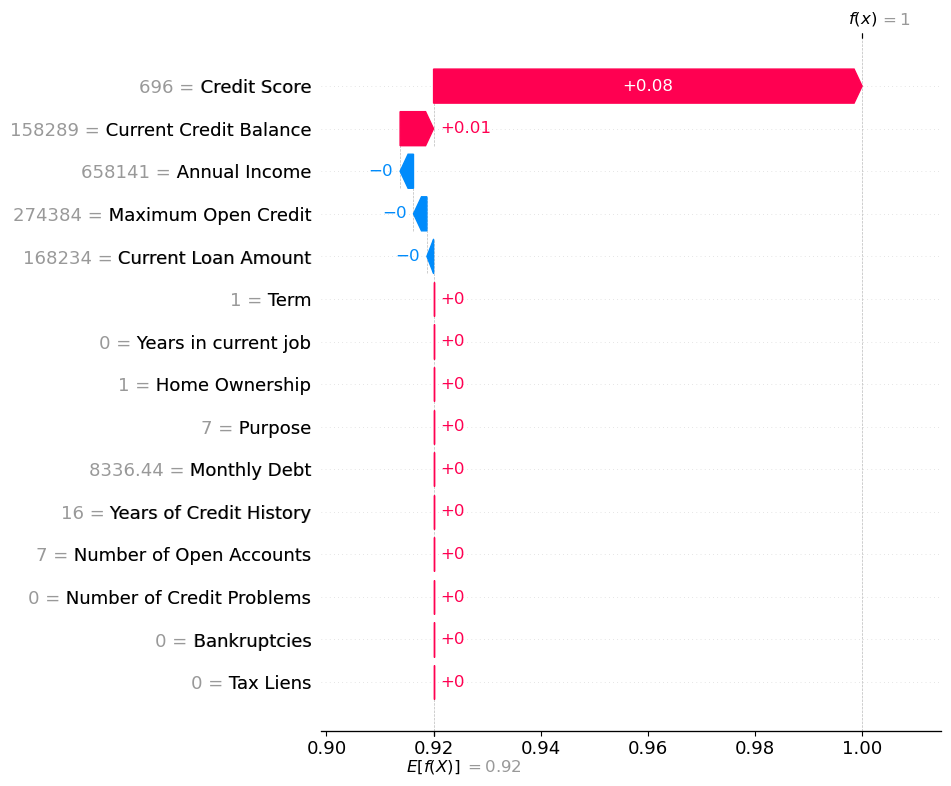

                      feature  contribution  base_value
0         Current Loan Amount      -0.00125        0.92
1                        Term       0.00000        0.92
2                Credit Score       0.08000        0.92
3               Annual Income      -0.00250        0.92
4        Years in current job       0.00000        0.92
5              Home Ownership       0.00000        0.92
6                     Purpose       0.00000        0.92
7                Monthly Debt       0.00000        0.92
8     Years of Credit History       0.00000        0.92
9     Number of Open Accounts       0.00000        0.92
10  Number of Credit Problems       0.00000        0.92
11     Current Credit Balance       0.00625        0.92
12        Maximum Open Credit      -0.00250        0.92
13               Bankruptcies       0.00000        0.92
14                  Tax Liens       0.00000        0.92


In [54]:
explainer_lr = shap.Explainer(lr.predict, x_test[1:500])
shap_values_lr = explainer_lr(x_test[1:500])
shap.waterfall_plot(shap_values_lr[165], max_display=20)

# extract the data used to create the plot
feature_names_lr = shap_values_lr.feature_names
contribution_lr = shap_values_lr.values[165]
base_value_lr = shap_values_lr.base_values[165]

# create a pandas DataFrame
data_lr = {
    'feature': feature_names_lr,
    'contribution': contribution_lr,
    'base_value': base_value_lr
}
df_lr = pd.DataFrame(data_lr)
print(df_lr)

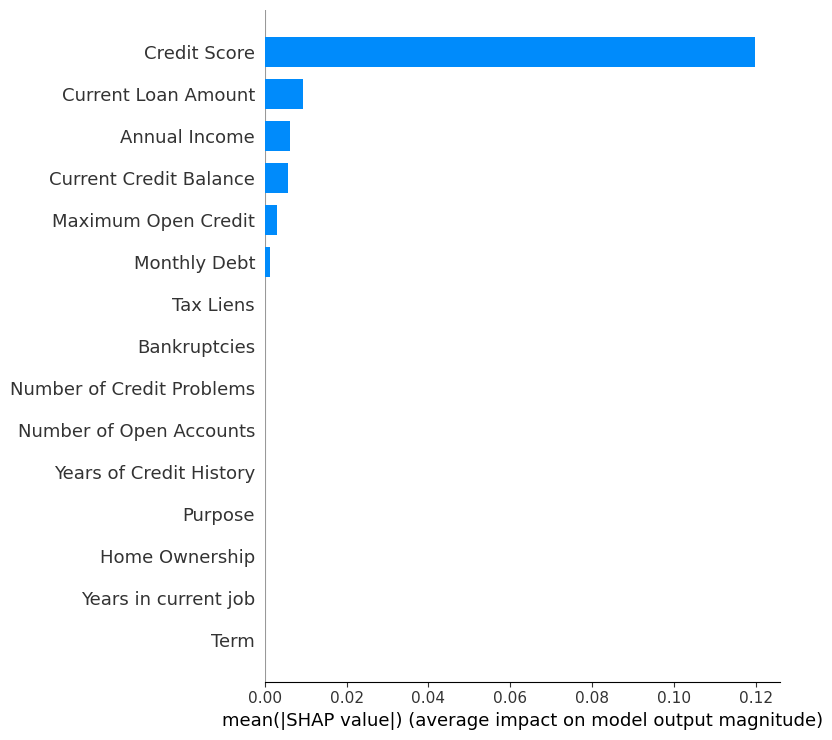

In [55]:
shap.summary_plot(shap_values_lr, x_test, plot_type="bar")

In [56]:
total_contribution_lr=np.sum(contribution_lr)
print(total_contribution_lr)

0.08000000000000003


In [57]:
predicted_value_lr=base_value_lr + total_contribution_lr
print(predicted_value_lr)

1.0


## XGBClassifier

In [58]:
xgb = xgb.XGBClassifier(
    learning_rate=0.7,
    max_depth=5,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [59]:
report = classification_report(y_test, y_pred_xgb)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.33      0.45      3159
         1.0       0.84      0.97      0.90     11853

    accuracy                           0.83     15012
   macro avg       0.79      0.65      0.68     15012
weighted avg       0.82      0.83      0.81     15012



In [60]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

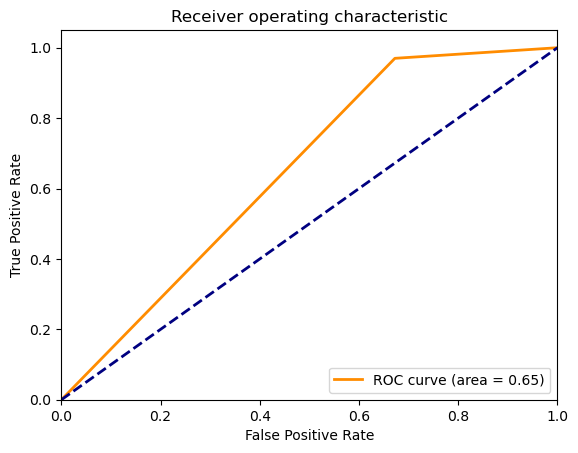

In [61]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
auc_score = roc_auc_score(y_test, y_pred_xgb)

print("AUC score:", auc_score)

AUC score: 0.6487581852046544


Permutation explainer: 500it [00:28, 11.46it/s]                                 


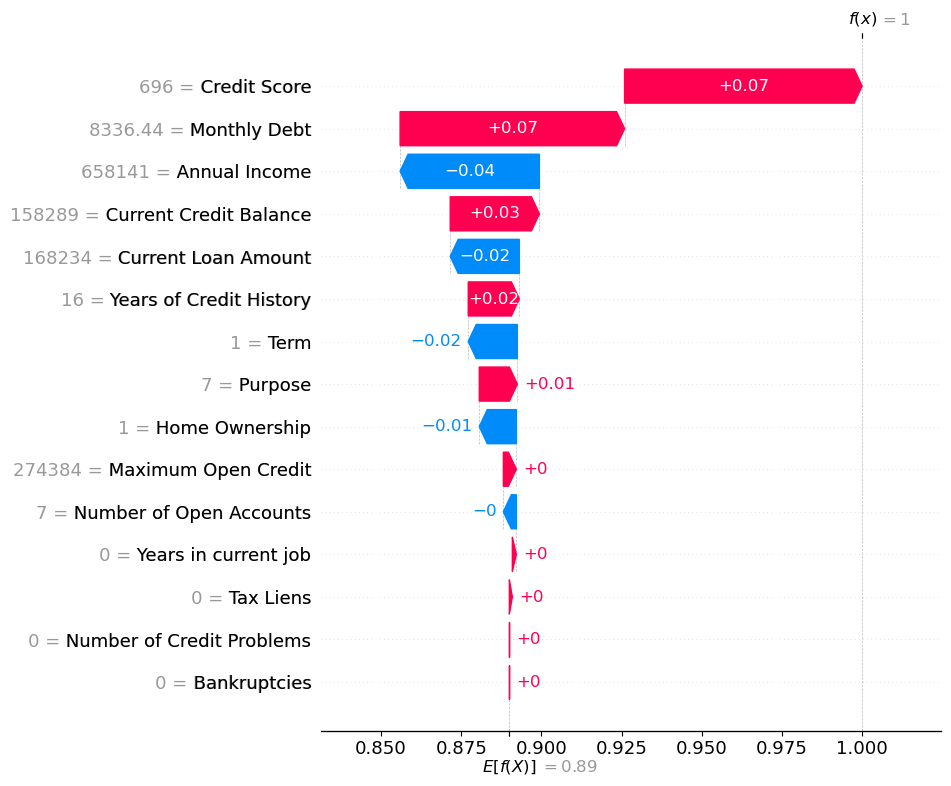

                      feature  contribution  base_value
0         Current Loan Amount     -0.021562        0.89
1                        Term     -0.015313        0.89
2                Credit Score      0.074062        0.89
3               Annual Income     -0.043438        0.89
4        Years in current job      0.001250        0.89
5              Home Ownership     -0.011562        0.89
6                     Purpose      0.011875        0.89
7                Monthly Debt      0.070000        0.89
8     Years of Credit History      0.015938        0.89
9     Number of Open Accounts     -0.004063        0.89
10  Number of Credit Problems      0.000000        0.89
11     Current Credit Balance      0.027813        0.89
12        Maximum Open Credit      0.004063        0.89
13               Bankruptcies      0.000000        0.89
14                  Tax Liens      0.000938        0.89


In [63]:
explainer_xgb = shap.Explainer(xgb.predict, x_test[1:500])
shap_values_xgb = explainer_xgb(x_test[1:500])
shap.waterfall_plot(shap_values_xgb[165], max_display=20)

# extract the data used to create the plot
feature_names_xgb = shap_values_xgb.feature_names
contribution_xgb = shap_values_xgb.values[165]
base_value_xgb = shap_values_xgb.base_values[165]

# create a pandas DataFrame
data_xgb = {
    'feature': feature_names_xgb,
    'contribution': contribution_xgb,
    'base_value': base_value_xgb
}
df_xgb = pd.DataFrame(data_xgb)
print(df_xgb)

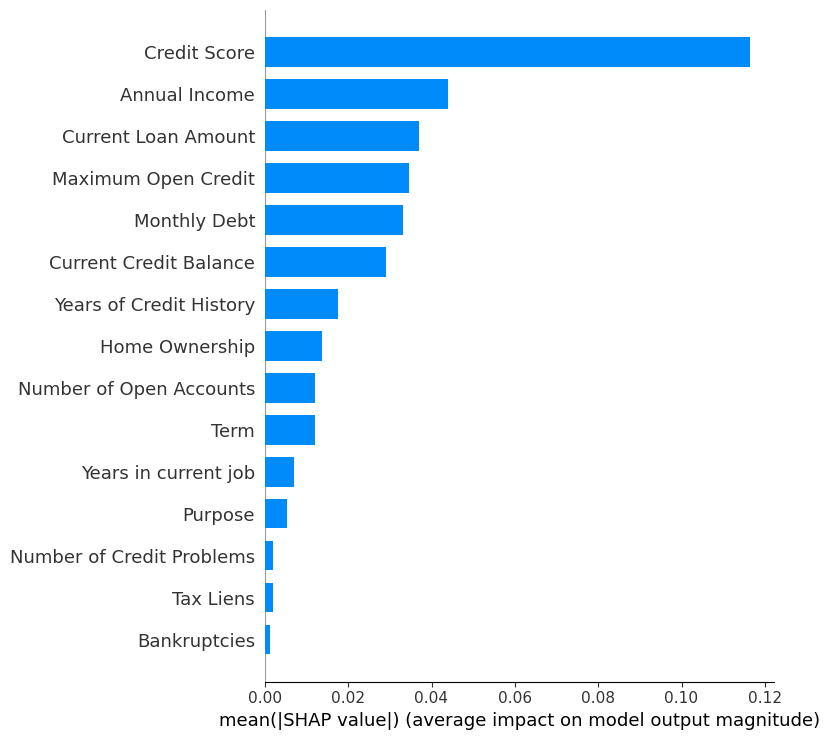

In [64]:
shap.summary_plot(shap_values_xgb, x_test, plot_type="bar")

In [65]:
total_contribution_xgb=np.sum(contribution_xgb)
print(total_contribution_xgb)

0.10999999999999996


In [66]:
predicted_value_xgb=base_value_xgb + total_contribution_xgb
print(predicted_value_xgb)

1.0


## Lightgbm

In [67]:
train_data = lgb.Dataset(x_train, label=y_train)

In [68]:
model = lgb.LGBMClassifier(learning_rate=0.6,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')
y_pred = model.predict(x_test)
print(y_pred)

[20]	training's binary_logloss: 0.338804	valid_0's binary_logloss: 0.393083
[40]	training's binary_logloss: 0.310178	valid_0's binary_logloss: 0.408233
[60]	training's binary_logloss: 0.281459	valid_0's binary_logloss: 0.419879


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[80]	training's binary_logloss: 0.255532	valid_0's binary_logloss: 0.431553
[100]	training's binary_logloss: 0.233184	valid_0's binary_logloss: 0.440074
[1. 1. 1. ... 1. 0. 0.]


In [69]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.64      0.36      0.46      3159
         1.0       0.85      0.95      0.89     11853

    accuracy                           0.82     15012
   macro avg       0.74      0.65      0.68     15012
weighted avg       0.80      0.82      0.80     15012



In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

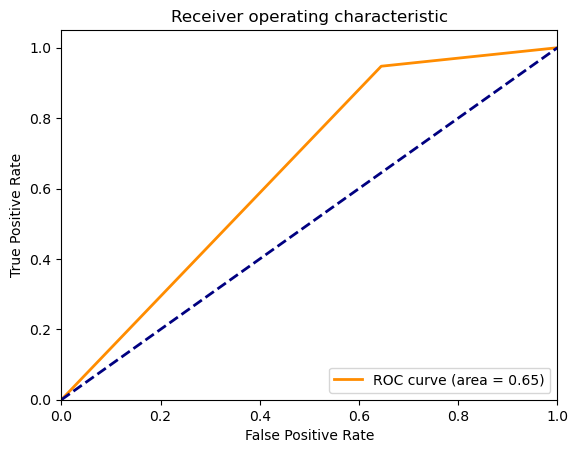

In [71]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:", auc_score)

AUC score: 0.6513075776553376


In [73]:
explainer_lgb = shap.Explainer(model.predict, x_test[1:500])
shap_values_lgb = explainer_lgb(x_test[1:500])

Permutation explainer: 500it [00:30, 11.16it/s]                                 


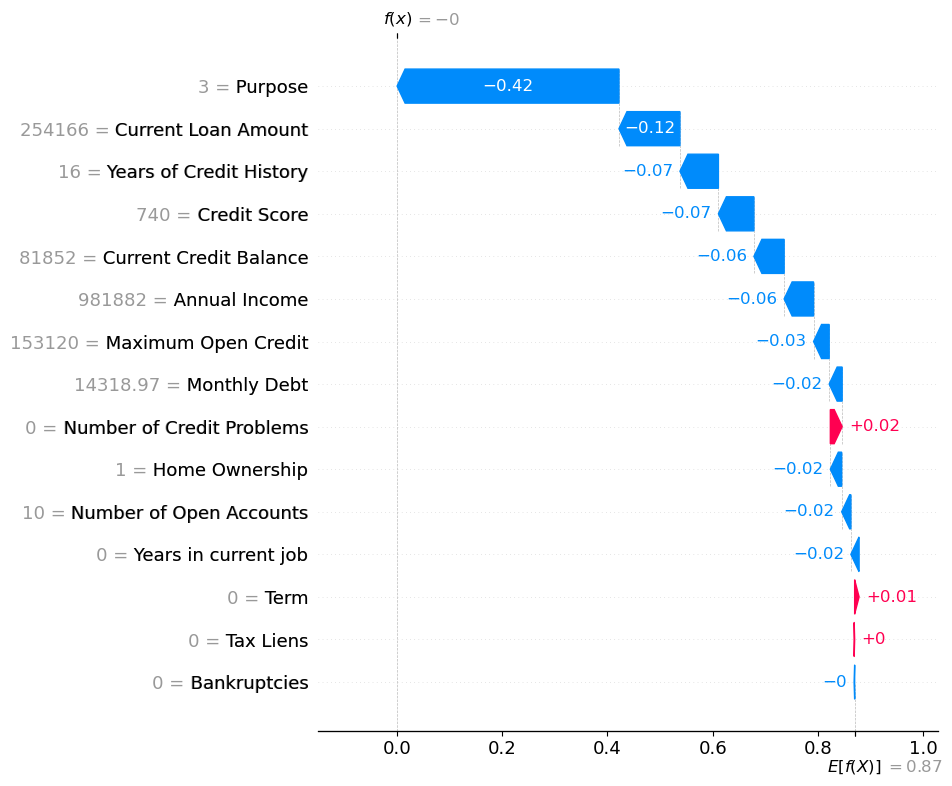

                                             feature  contribution      value  \
Current Loan Amount              Current Loan Amount     -0.115937  254166.00   
Term                                            Term      0.008438       0.00   
Credit Score                            Credit Score     -0.067500     740.00   
Annual Income                          Annual Income     -0.055938  981882.00   
Years in current job            Years in current job     -0.015625       0.00   
Home Ownership                        Home Ownership     -0.021562       1.00   
Purpose                                      Purpose     -0.421875       3.00   
Monthly Debt                            Monthly Debt     -0.024688   14318.97   
Years of Credit History      Years of Credit History     -0.073125      16.00   
Number of Open Accounts      Number of Open Accounts     -0.017500      10.00   
Number of Credit Problems  Number of Credit Problems      0.022500       0.00   
Current Credit Balance      

In [74]:
shap.waterfall_plot(shap_values_lgb[36], max_display=20)

# extract the data used to create the plot
feature_names_lgb = shap_values_lgb.feature_names
contribution_lgb = shap_values_lgb.values[36]
value_lgb = x_test.iloc[37]
base_value_lgb = shap_values_lgb.base_values[36]

# create a pandas DataFrame
data_lgb= {
    'feature': feature_names_lgb,
    'contribution': contribution_lgb,
    'value': value_lgb,
    'base_value': base_value_lgb
}
df_lgb = pd.DataFrame(data_lgb)
print(df_lgb)

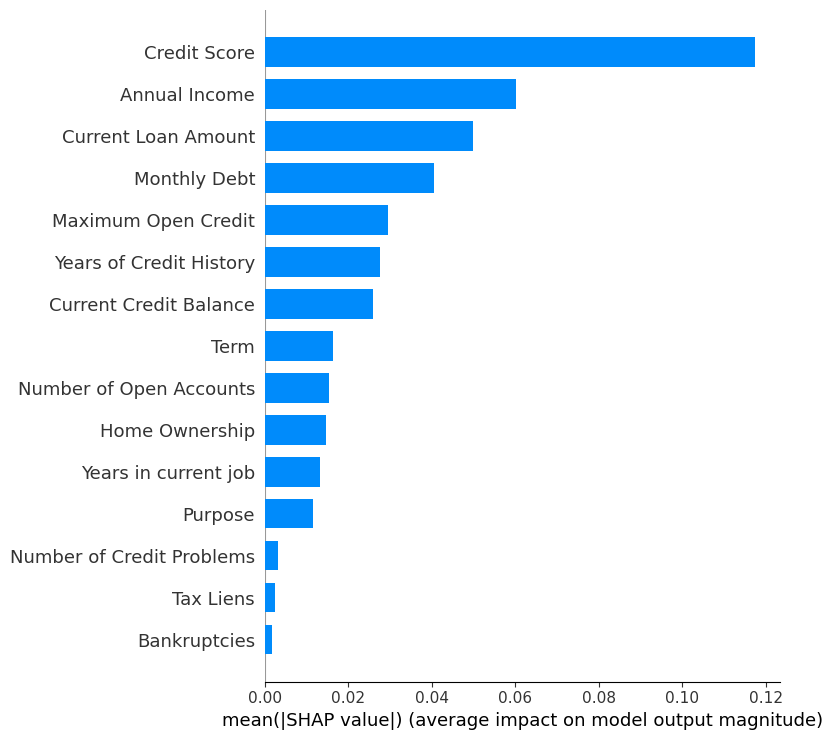

In [75]:
shap.summary_plot(shap_values_lgb, x_test, plot_type="bar")

In [76]:
total_contribution_lgb=np.sum(contribution_lgb)
print(total_contribution_lgb)

-0.8700000000000001


In [77]:
predicted_value_lgb=base_value_lgb + total_contribution_lgb
print(predicted_value_lgb)

-1.1102230246251565e-16


In [78]:
result=[]
result_max=[]
result_feature=[]
if(predicted_value_lgb <=0):
    min_3_values = df_lgb.nsmallest(3, 'contribution')
    max_values = df_lgb.nlargest(1, 'contribution')
    
    selected_value=min_3_values[['feature', 'contribution','value']]
    df_selected=pd.DataFrame(selected_value)

    
    df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution_lgb) * 100)
    print(df_selected)
    
    condition = df_selected.loc[df_selected['percentage'] >=10]
    
    for index, row in condition.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    for index, row in max_values.iterrows():
        feature_variable=row['feature']
        result_max.append(feature_variable)

    print('\n')   
    print("We are sorry to inform you that you are not elligible for the loan at the moment")
    print(f"Though you are having a good {result_max[0]}")
    print("Due to the following issues your loan got rejected:",',' .join([str(lst) for lst in result]))
    print("If you have any questions or concerns about our decision, please do not hesitate to reach out to us.")
    
else:
    max_3_values = df_lgb.nlargest(3, 'contribution')
    
    selected_value=max_3_values[['feature', 'contribution','value']]
   
    df_selected_max=pd.DataFrame(selected_value)
    df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution_lgb) * 100)
    print(df_selected_max)

    for index, row in max_3_values.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    print('\n')    
    print("Congrats You are eligible for the loan !")
    print("There are severable factors which makes this possible such as:",',' .join([str(lst) for lst in result]))

                                         feature  contribution     value  \
Purpose                                  Purpose     -0.421875       3.0   
Current Loan Amount          Current Loan Amount     -0.115937  254166.0   
Years of Credit History  Years of Credit History     -0.073125      16.0   

                         percentage  
Purpose                   48.491379  
Current Loan Amount       13.326149  
Years of Credit History    8.405172  


We are sorry to inform you that you are not elligible for the loan at the moment
Though you are having a good Number of Credit Problems
Due to the following issues your loan got rejected: Purpose,Current Loan Amount
If you have any questions or concerns about our decision, please do not hesitate to reach out to us.


In [79]:
if "Annual Income" in df_selected["feature"].values:
    annual_income_value = df_selected.loc[df_selected["feature"] == "Annual Income", "value"].values[0]
    my_x = x_test.iloc[36]
    ranges = []
    start = end = None  # initialize start and end variables
    for i in range(170981, 180000):
        my_x["Annual Income"] = i
        my_pred = model.predict([my_x])
        if my_pred == 1:
            if end is not None and i == end + 1:
                end = i  # extend the current range
            else:
                if start is not None:
                    if start == end:
                        ranges.append(str(start))
                    else:
                        ranges.append(str(start) + "-" + str(end))
                start = end = i  # start a new range
    if start is not None:
        if start == end:
            ranges.append(str(start))
        else:
            ranges.append(str(start) + "-" + str(end))
        if len(ranges) > 1 and ranges[0] == str(start):
            ranges = ranges[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
        print("Annual income ranges for positive prediction are:", ", ".join(ranges))

if "Monthly Debt" in df_selected["feature"].values:
    my_x = x_test.iloc[36]
    ranges_m = []
    start = end = None  # initialize start and end variables
    for j in range(0,10000):
        my_x["Monthly Debt"] = j
        my_pred = model.predict([my_x])
        if my_pred == 1:
            if end is not None and j == end + 1:
                end = j  # extend the current range
            else:
                if start is not None:
                    if start == end:
                        ranges_m.append(str(start))
                    else:
                        ranges_m.append(str(start) + "-" + str(end))
                start = end = j  # start a new range
    if start is not None:
        if start == end:
            ranges_m.append(str(start))
        else:
            ranges_m.append(str(start) + "-" + str(end))
        if len(ranges_m) > 1 and ranges_m[0] == str(start):
            ranges_m = ranges_m[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
        print("Monthly Debt ranges for positive prediction are:", ", ".join(ranges_m))
if "Credit Score" in df_selected["feature"].values:
    my_x = x_test.iloc[36]
    ranges_c = []
    start = end = None  # initialize start and end variables
    for k in range(550,900):
        my_x["Credit Score"] = k
        my_pred = model.predict([my_x])
        if my_pred == 1:
            if end is not None and k == end + 1:
                end = k  # extend the current range
            else:
                if start is not None:
                    if start == end:
                        ranges_c.append(str(start))
                    else:
                        ranges_c.append(str(start) + "-" + str(end))
                start = end = k  # start a new range
    if start is not None:
        if start == end:
            ranges_c.append(str(start))
        else:
            ranges_c.append(str(start) + "-" + str(end))
        if len(ranges_c) > 1 and ranges_c[0] == str(start):
            ranges_c = ranges_c[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
        print("Credit Score ranges for positive prediction are:", ", ".join(ranges_c))
if "Number of Open Accounts" in df_selected["feature"].values:
    my_x = x_test.iloc[36]
    ranges_n = []
    start = end = None  # initialize start and end variables
    for l in range(0,70):
        my_x["Credit Score"] = l
        my_pred = model.predict([my_x])
        if my_pred == 1:
            if end is not None and l == end + 1:
                end = l  # extend the current range
            else:
                if start is not None:
                    if start == end:
                        ranges_n.append(str(start))
                    else:
                        ranges_n.append(str(start) + "-" + str(end))
                start = end = l  # start a new range
    if start is not None:
        if start == end:
            ranges_n.append(str(start))
        else:
            ranges_n.append(str(start) + "-" + str(end))
        if len(ranges_c) > 1 and ranges_c[0] == str(start):
            ranges_n = ranges_n[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
        print("Number of Open Accounts ranges for positive prediction are:", ", ".join(ranges_n))

In [80]:
model.predict([x_test.iloc[33]])
my_x = x_test.iloc[33]
for i in range(0,70):
    my_x["Number of Open Accounts"] = i
    my_pred = model.predict([my_x])
    if my_pred == 1:
        print(i)
my_x["Number of Open Accounts"] = 0
my_pred = model.predict([my_x])
print("With 11 accounts your answer would be ", my_pred)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
With 11 accounts your answer would be  [1.]


In [81]:
def shap_predictor(value):
        sample=pd.DataFrame({'Current Loan Amount':[value["Current Loan Amount"]],'Term':[value["Term"]],'Credit Score':[value["Credit Score"]], 'Annual Income':[value['Annual Income']], 'Years in current job':[value['Years in current job']]
                    , 'Home Ownership':[value['Home Ownership']], 'Purpose':[value['Purpose']], 'Monthly Debt':[value['Monthly Debt']],'Years of Credit History':[value['Years of Credit History']], 
                     'Number of Open Accounts':[value['Number of Open Accounts']]
                    , 'Number of Credit Problems':[value['Number of Credit Problems']], 'Current Credit Balance':[value['Current Credit Balance']], 'Maximum Open Credit':[value['Maximum Open Credit']], 'Bankruptcies':[value['Bankruptcies']],
                     'Tax Liens':[value['Tax Liens']] })
        
        sample.to_excel('my_variable.xlsx', index=False)
        df=pd.read_excel("my_variable.xlsx")
           
        background = shap.maskers.Independent(x_test, max_samples=50)
        explainer = shap.Explainer(model.predict, background)
        shap_values = explainer(df)
        shap.plots.waterfall(shap_values[0], max_display=20)
                
        feature_names = shap_values.feature_names
        feature_values = df.iloc[0]
        contribution = shap_values.values[0]
        base_value = shap_values.base_values[0]

    # create a pandas DataFrame
        data = {
            'feature': feature_names,
            'value': feature_values,
            'contribution': contribution,
            'base_value': base_value
        }
        data = pd.DataFrame(data)
        total_contribution=np.sum(contribution)        
        predicted_value=base_value + total_contribution
        return predicted_value,data,total_contribution,sample,df
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.20.10.5:2000/ (Press CTRL+C to quit)
172.20.10.5 - - [27/Mar/2023 13:50:50] "GET / HTTP/1.1" 200 -


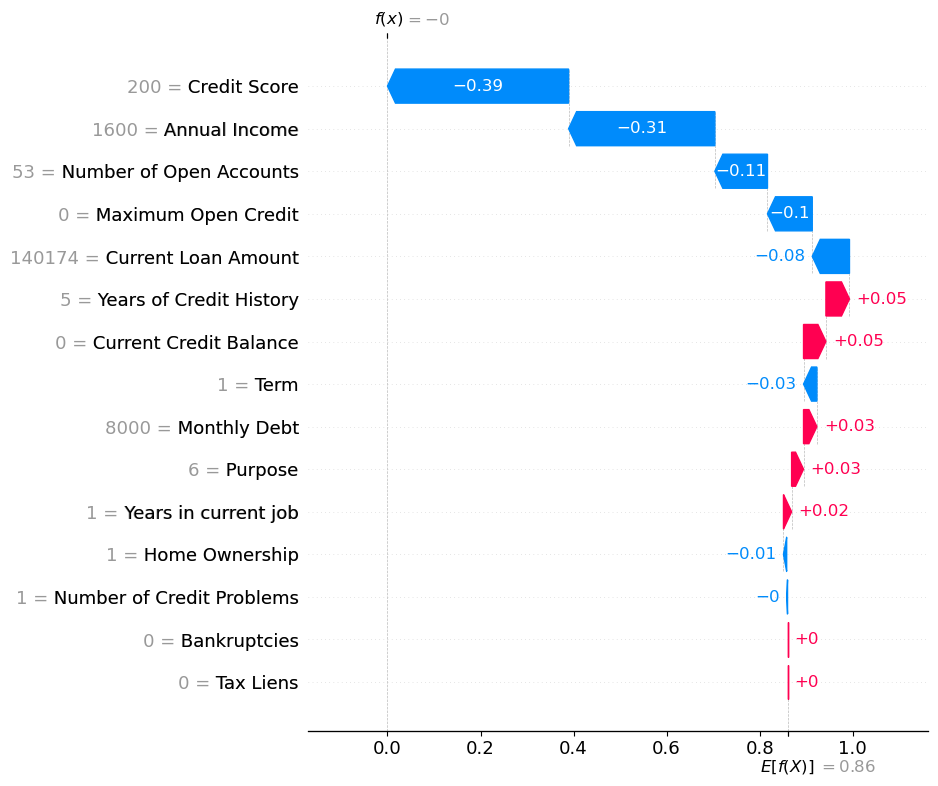

                                             feature   value  contribution  \
Current Loan Amount              Current Loan Amount  140174     -0.080000   
Term                                            Term       1     -0.028750   
Credit Score                            Credit Score     200     -0.389375   
Annual Income                          Annual Income    1600     -0.314375   
Years in current job            Years in current job       1      0.017500   
Home Ownership                        Home Ownership       1     -0.006875   
Purpose                                      Purpose       6      0.025625   
Monthly Debt                            Monthly Debt    8000      0.028750   
Years of Credit History      Years of Credit History       5      0.050625   
Number of Open Accounts      Number of Open Accounts      53     -0.113125   
Number of Credit Problems  Number of Credit Problems       1     -0.001875   
Current Credit Balance        Current Credit Balance       0    

172.20.10.5 - - [27/Mar/2023 13:51:39] "POST / HTTP/1.1" 200 -


In [89]:
import os
from flask import *
from flask import request, render_template
import json
import shap

app = Flask(__name__)

#model=pickle.load(open('model.pk1','rb'))

@app.route("/", methods=["GET", "POST"])

def home():
    message = ""
    message1 = ""
    message2 = ""
    message3 = ""
    message4 = ""
    message5 = ''
    message6 = ''
    message7 = ''
    message8 = ''
    if request.method == "POST":      
        data=request.form.to_dict()
        json_data_dump=json.dumps(data)
        json_data=json.loads(json_data_dump)
        value = json.loads(json_data_dump)
            
        result=[]
        result_max=[]
        predicted_value,data,total_contribution,sample,df=shap_predictor(value)
        print(data)
        
        if(predicted_value <=0):
            print('a')
            min_3_values = data.nsmallest(3, 'contribution')
            max_values = data.nlargest(1, 'contribution')
            
            selected_value=min_3_values[['feature', 'contribution','value']]
            df_selected=pd.DataFrame(selected_value)
            
            df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution) * 100)
            print(df_selected)

            condition = df_selected.loc[df_selected['percentage'] >=10]
            
            for index, row in condition.iterrows():
                feature_variables=row['feature']
                result.append(feature_variables)
        
            for index, row in max_values.iterrows():
                feature_variable=row['feature']
                result_max.append(feature_variable)
                
            message = "we are sorry to inform that you are not eligible for the loan"
            message1=f"Though you are having a good score in {result_max[0]}"
            response = jsonify(','.join([str(lst) for lst in result]))
            message2="Due to the following issues your loan got rejected:" + response.get_data(as_text=True)
            message3="If you have any questions or concerns about our decision, please do not hesitate to reach out to us."
           
            if "Annual Income" in df_selected["feature"].values:
                    my_x = df.iloc[0]
                    ranges = []
                    start = end = None  # initialize start and end variables
                    for i in range(170981, 180000):
                        my_x["Annual Income"] = i
                        my_pred = model.predict([my_x])
                        if my_pred == 1:
                            if end is not None and i == end + 1:
                                end = i  # extend the current range
                            else:
                                if start is not None:
                                    if start == end:
                                        ranges.append(str(start))
                                    else:
                                        ranges.append(str(start) + "-" + str(end))
                                start = end = i  # start a new range
                    if start is not None:
                        if start == end:
                            ranges.append(str(start))
                        else:
                            ranges.append(str(start) + "-" + str(end))
                        if len(ranges) > 1 and ranges[0] == str(start):
                            ranges = ranges[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                        message4= "Annual income ranges for positive prediction are:", ", ".join(ranges)
                     

                    if df_selected["feature"].values[0] == "Monthly Debt":
                        my_x = df.iloc[0]
                        ranges_m = []
                        start = end = None  # initialize start and end variables
                        for j in range(0,10000):
                            my_x["Monthly Debt"] = j
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and j == end + 1:
                                    end = j  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_m.append(str(start))
                                        else:
                                            ranges_m.append(str(start) + "-" + str(end))
                                    start = end = j  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_m.append(str(start))
                            else:
                                ranges_m.append(str(start) + "-" + str(end))
                            if len(ranges_m) > 1 and ranges_m[0] == str(start):
                                ranges_m = ranges_m[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message5 = "Monthly Debt ranges for positive prediction are:", ", ".join(ranges_m)
                            
                    if df_selected["feature"].values[0] == "Credit Score":
                        my_x = df.iloc[0]
                        ranges_c = []
                        start = end = None  # initialize start and end variables
                        for k in range(550,900):
                            my_x["Credit Score"] = k
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and k == end + 1:
                                    end = k  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_c.append(str(start))
                                        else:
                                            ranges_c.append(str(start) + "-" + str(end))
                                    start = end = k  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_c.append(str(start))
                            else:
                                ranges_c.append(str(start) + "-" + str(end))
                            if len(ranges_c) > 1 and ranges_c[0] == str(start):
                                ranges_c = ranges_c[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message6 = "Credit Score ranges for positive prediction are:", ", ".join(ranges_c)
                        

                    if df_selected["feature"].values[0] == "Number of Open Accounts":
                        my_x = df.iloc[0]
                        ranges_n = []
                        start = end = None  # initialize start and end variables
                        for l in range(0,70):
                            my_x["Number of Open Accounts"] = l
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and l == end + 1:
                                    end = l  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_n.append(str(start))
                                        else:
                                            ranges_n.append(str(start) + "-" + str(end))
                                    start = end = l  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_n.append(str(start))
                            else:
                                ranges_n.append(str(start) + "-" + str(end))
                            if len(ranges_c) > 1 and ranges_c[0] == str(start):
                                ranges_n = ranges_n[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message7 = "Number of Open Accounts ranges for positive prediction are:", ", ".join(ranges_n)
                            message8 = "" 
       
        else:
            print("b")
            max_3_values = data.nlargest(3, 'contribution')

            selected_value=max_3_values[['feature', 'contribution']]
            df_selected_max=pd.DataFrame(selected_value)
            
            df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution) * 100)
            print(df_selected_max)
            
            X=df_selected_max.iloc[0]
            print(X)

            for index, row in max_3_values.iterrows():
                feature_variables=row['feature']
                result.append(feature_variables)
            message = "Congrats! you are elligible for the loan"
            response = jsonify(','.join([str(lst) for lst in result]))
            message1="There are severable factors which makes this possible such as:" + response.get_data(as_text=True)
            message2 = 'The results are based on the values provided any changes will vary the result'
            message3 = 'Please reach out to the bank for further proceedings'
            message4 = ''
            message5 = ''
            message6 = ''
            message7 = ''
            message8 = ''

            
        if predicted_value: 
            return render_template("home.html",index=predicted_value,message = message,message1 = message1, 
                                   message2 = message2, message3=message3,message4 = message4,
                                  message5 = message5,message6=message6,message7=message7,message8=message8)
    return render_template("home.html")
            
    

if __name__ == "__main__":
    #app.debug= True
    app.run(host='0.0.0.0', port=2000)
